# $\mathbb{T}$


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

## Data generation

In [ ]:
def make_torus(n_samples=1000, R=1.0, r=0.5, noise=0.05):
    theta = np.random.uniform(0, 2 * np.pi, n_samples)
    phi = np.random.uniform(0, 2 * np.pi, n_samples)

    # Coordenadas sin ruido
    x = (R + r * np.cos(phi)) * np.cos(theta)
    y = (R + r * np.cos(phi)) * np.sin(theta)
    z = r * np.sin(phi)

    # Añadir ruido
    x += np.random.normal(0, noise, n_samples)
    y += np.random.normal(0, noise, n_samples)
    z += np.random.normal(0, noise, n_samples)

    data = np.stack((x, y, z), axis=1)
    return data


In [ ]:
data = make_torus(n_samples=1000, R=1.0, r=0.5, noise=0.06)
print('Data dimension: {}'.format(data.shape))

Data dimension: (1000, 3)



Visualize the data

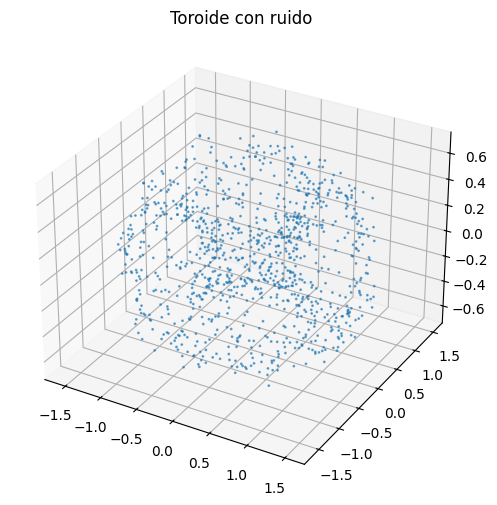

In [ ]:
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(data[:, 0], data[:, 1], data[:, 2], s=1, alpha=0.6)
ax.set_title("Toroide con ruido")
plt.show()

## Persistent Homology

In [ ]:
!pip install ripser
from ripser import Rips

Rips(maxdim=2, thresh=inf, coeff=2, do_cocycles=False, n_perm = None, verbose=True)
CPU times: user 2min 35s, sys: 9.05 s, total: 2min 44s
Wall time: 2min 51s


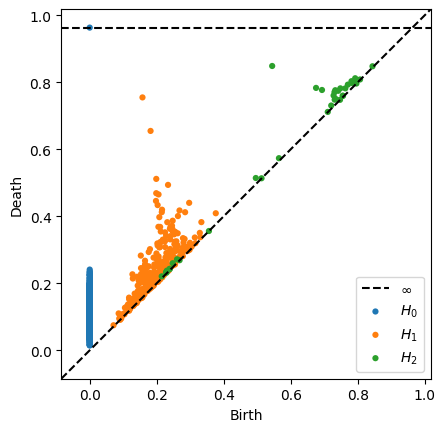

In [ ]:
%%time
rips = Rips(maxdim = 2)
dgms = rips.fit_transform(data)
rips.plot(dgms)